In [32]:
import seaborn as sns
from pathlib import Path
import os
from loguru import logger
import math
import jq
import json
import polars as pl
import matplotlib.pyplot as plt
import pandas as pd

2025-04-08 19:34:10.820 | INFO     | __main__:<module>:8 - reading report file ../report/tpch-sf1/duckdb/thread_1.json
2025-04-08 19:34:10.827 | INFO     | __main__:<module>:8 - reading report file ../report/tpch-sf1/duckdb/thread_2.json
2025-04-08 19:34:10.839 | INFO     | __main__:<module>:8 - reading report file ../report/tpch-sf1/duckdb/thread_4.json
2025-04-08 19:34:10.846 | INFO     | __main__:<module>:8 - reading report file ../report/tpch-sf1/duckdb/thread_8.json
2025-04-08 19:34:10.852 | INFO     | __main__:<module>:8 - reading report file ../report/tpch-sf1/duckdb/thread_16.json
2025-04-08 19:34:10.858 | INFO     | __main__:<module>:8 - reading report file ../report/tpch-sf1/duckdb/thread_32.json
2025-04-08 19:34:10.863 | INFO     | __main__:<module>:8 - reading report file ../report/tpch-sf1/duckdb/thread_64.json
2025-04-08 19:34:10.869 | INFO     | __main__:<module>:8 - reading report file ../report/tpch-sf1/duckdb/thread_128.json
2025-04-08 19:34:10.873 | INFO     | __main

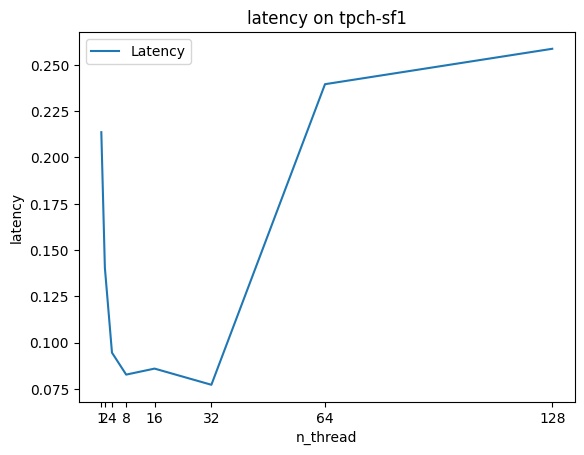

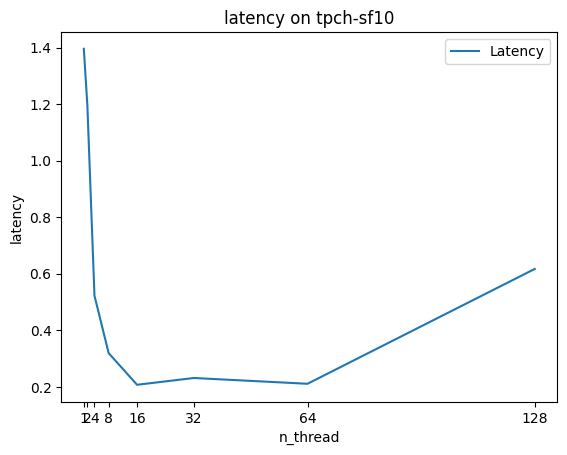

In [38]:
max_thread_cnt = 128
exponent = 0
data_entries = []
for testset in ["tpch-sf1", "tpch-sf10"]:
    for exponent in range(int(math.log2(128)) + 1):
        n_thread = 2 ** exponent
        report_file = f"../report/{testset}/duckdb/thread_{n_thread}.json"
        logger.info(f"reading report file {report_file}")

        with open(report_file) as f:
            json_data = json.load(f)
        cpu_time = jq.compile('.cpu_time').input(json_data).first()
        latency = jq.compile('.latency').input(json_data).first()
        
        data_entries.append({
            "n_thread": n_thread,
            "testset": testset,
            "cpu_time": cpu_time,
            "latency": latency,
        })

df = pl.DataFrame(data_entries)
tick_positions = [2 ** i for i in range(int(math.log2(max_thread_cnt)) + 1)]
for testset in ["tpch-sf1", "tpch-sf10"]:
    ax = sns.lineplot(data=df.sql(f"select * from self where testset = '{testset}'"), x="n_thread", y="latency", label="Latency")
    ax.set_xticks(tick_positions)
    ax.legend()
    ax.set_title(f"latency on {testset}")
    plt.show()